# Importing Dataset

In [1]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# save and load a file
import pickle

# Import Dataset 

In [31]:
# Split dataset into training 70% and testing 30%

In [32]:
df_train = pd.read_csv("C:\\Users\\User\\Downloads\\traintrain.csv")
df_test = pd.read_csv("C:\\Users\\User\\Downloads\\testtest.csv")

X_train = df_train.message
X_test = df_test.message

y_train = df_train.label
y_test = df_test.label

class_names = ['1','0']
data = pd.concat([df_train, df_test])

print('Size of training set: %s' % (len(df_train['message'])))
print('Size of validationset: %s' % (len(df_test['message'])))
print(data.label.value_counts())

data.head()

Size of training set: 1505
Size of validationset: 183
1    1134
0     554
Name: label, dtype: int64


,Unnamed: 0,message,label
0,211089.0,youtube was a big help.,0
1,800704.0,Your loved ones are the ones that will put you...,1
2,800249.0,your future place is jahannam if you make fun ...,1
3,800847.0,You have everything you needwithin you to win ...,1
4,800068.0,You ever just... Get happy... To flex on... Th...,1


# Text Preprocessing

In [33]:
#Here we remove punctuation, tokenization, stemming, negation handling, remove html markups.

In [34]:
def preprocessingdata(data):
    #remove html markup
    data = re.sub("(<.*?)", "", data)
    
    #remove urls
    data = re.sub(r'http\S+', "", data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data) 
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return stem_data
    

# Text Representation 


In [35]:
data[data.message.isna()]

,Unnamed: 0,message,label


In [8]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocessingdata, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.message)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

# Classifiers

# Naive Bayes

In [9]:
#create confusion matrix for later evaluation

In [10]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
     # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Accuracy: 50.27%

F1 Score: 50.27

COnfusion Matrix:
 [[ 3 91]
 [ 0 89]]


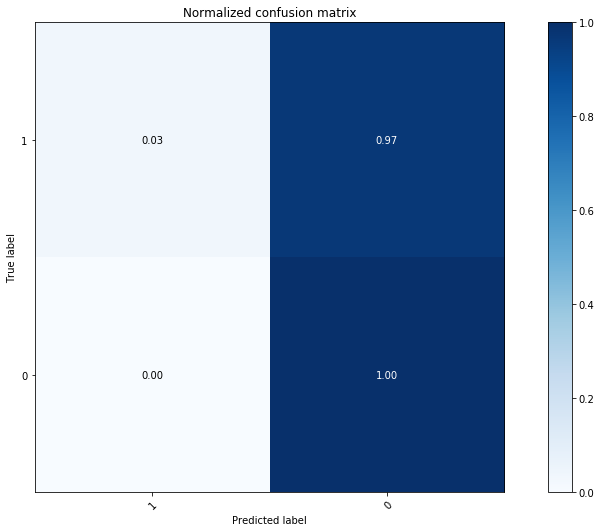

In [11]:
nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

ynb_pred = nb.predict(X_test_vect)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ynb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ynb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ynb_pred))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, ynb_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

Accuracy: 93.44%

F1 Score: 93.44

COnfusion Matrix:
 [[85  9]
 [ 3 86]]


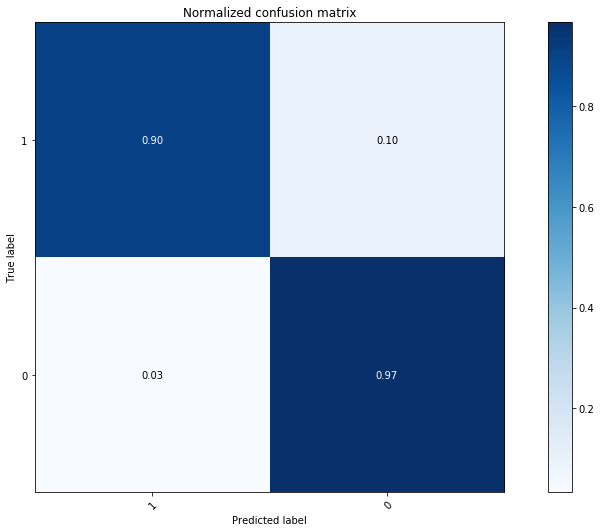

In [12]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_vect, y_train)

yrf_pred = rf.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

plot_confusion_matrix(y_test, yrf_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()


# Logistic Regression 

Accuracy: 57.92%

F1 Score: 57.92

COnfusion Matrix:
 [[17 77]
 [ 0 89]]


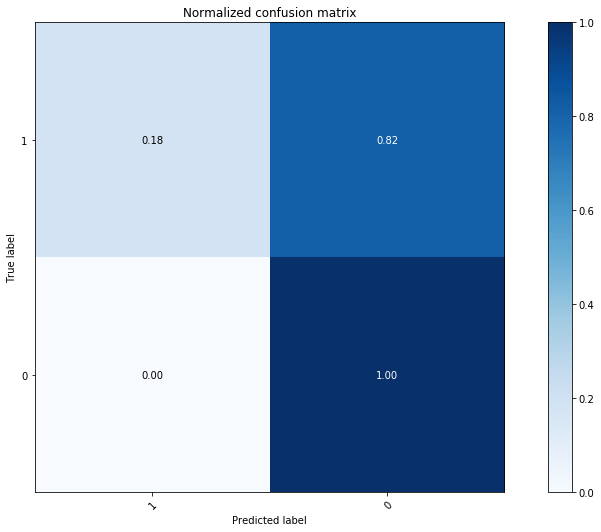

In [13]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

plot_confusion_matrix(y_test, ylog_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# Support Vector

Accuracy: 85.79%

F1 Score: 85.79

COnfusion Matrix:
 [[72 22]
 [ 4 85]]


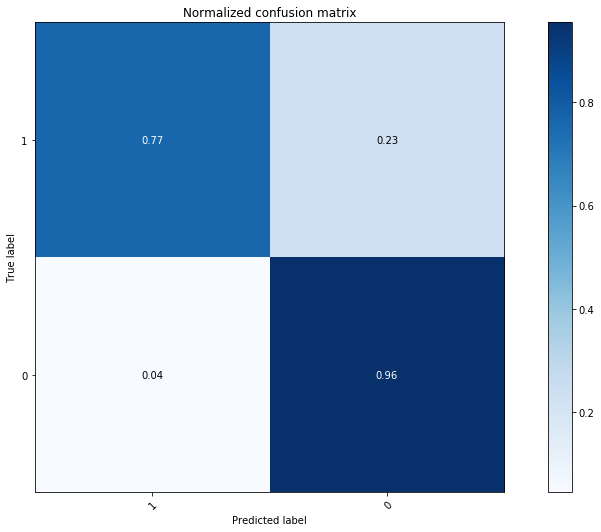

In [14]:
svc = LinearSVC(tol=1e-05)
svc.fit(X_train_vect, y_train)

ysvm_pred = svc.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

plot_confusion_matrix(y_test, ysvm_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# Saving the models into a pipeline

In [15]:
#Create pipeline with our tf-idf vectorizer and LinearSVC model
rf_model = Pipeline([
    ('tfidf', vect),
    ('clf', rf),
])

In [16]:
# save the model
filename = 'tfidf_rf.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [17]:
model = pickle.load(open(filename, 'rb'))

test_response = 'i am okay haha'
model.predict([test_response])

array([0], dtype=int64)

In [18]:
model = pickle.load(open(filename, 'rb'))

test_response = 'i am happy!'
model.predict([test_response])

array([0], dtype=int64)

In [19]:
model = pickle.load(open(filename, 'rb'))

test_response = 'i feel like crying'
print(model.predict([test_response]))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))

[1]
Accuracy: 93.44%


In [20]:
model = pickle.load(open(filename, 'rb'))

test_response = 'my depression is making me sad'
print(model.predict([test_response]))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))

[1]
Accuracy: 93.44%


In [21]:
model = pickle.load(open(filename, 'rb'))

test_response = 'i wanna kms'
model.predict([test_response])

array([1], dtype=int64)

In [22]:
#Create pipeline with our tf-idf vectorizer and LinearSVC model
svc_model = Pipeline([
    ('tfidf', vect),
    ('clf', svc),
])

In [23]:
# save the model
filename = 'tfidf_svc.sav'
pickle.dump(svc_model, open(filename, 'wb'))

In [30]:
model = pickle.load(open(filename, 'wb'))

test_response = 'i wanna die'
print("Detected: ", model.predict([test_response]))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))

UnsupportedOperation: read

In [26]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

%matplotlib inline

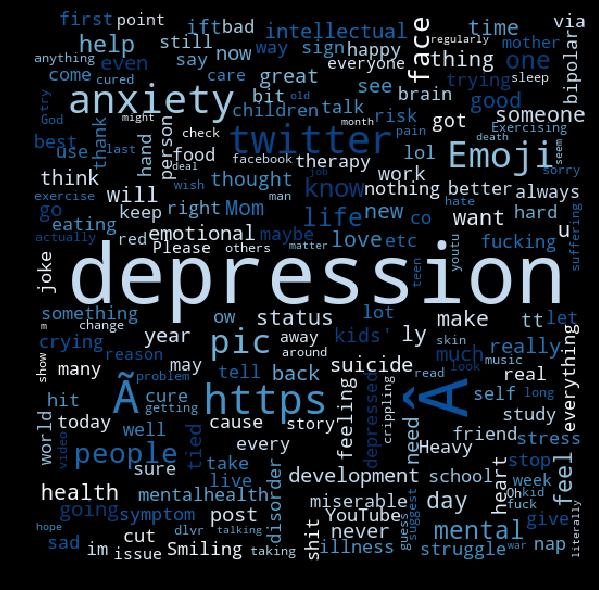

In [27]:
depressive_words = ' '.join(list(data[data['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

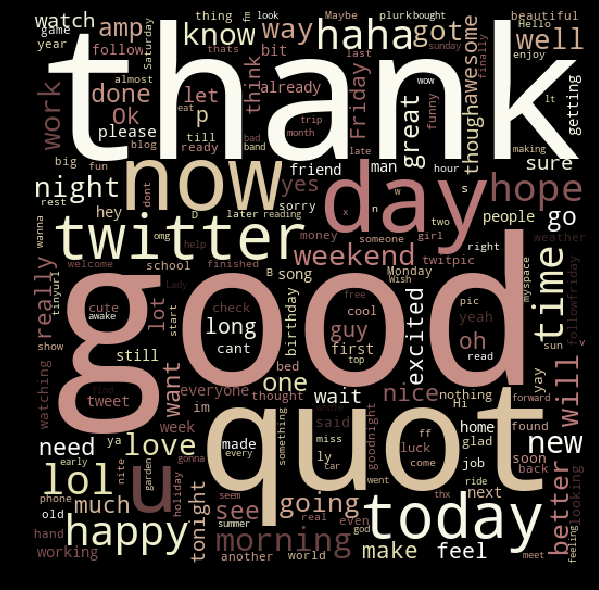

In [28]:
notdepressive_words = ' '.join(list(data[data['label'] == 0]['message']))
notdepressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="pink").generate(notdepressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(notdepressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [1]:
#pie chart

In [2]:
from matplotlib import pyplot as plt
import numpy as np


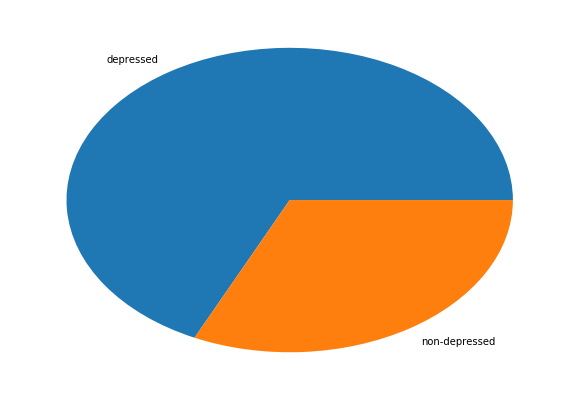

In [3]:
disorder = ['depressed', 'non-depressed']
data = ['1134', '534']

frg = plt.figure(figsize = (10, 7))
plt.pie(data, labels = disorder)

plt.show()



In [ ]:
from xgboost import XGBClassifier 
xgb_model = xgb_model.predict()